## Observations and Insights

In [ ]:
# First observation is that Capomulin and Ramicane were both significantly more effective at reducing tumor volume compared to the other two drugs in the 4 drugs isoloated set

# Second observation is that the weight of the mouse is directly correlated with the size of the tumor.  The larger the mouse, the larger the average size of the tumor.

# One inference I would make is that the tumor size would probably continue to decrease in size after 45 days.  There are no data points past this time point, however, the line comparing the tumor size to the timepoints is linear, meaning i would infer that after 45 days...you would continue to see decreased tumor size

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



# Combine the data into a single dataset

combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

combined_data_df = combined_data_df.fillna(0)

#create mean dataframe
mean_df = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()


#create median dataframe
median_df = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()


#create variance dataframe
var_df = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()


#create standard devation dataframe
std_df = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()


#create standard error dataframe
sem_df = combined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


#merge mean and median tables to form summary tables
summarystatsdf = pd.merge(mean_df, median_df, how='outer', on='Drug Regimen')
summarystatsdf = summarystatsdf.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean",
                                                "Tumor Volume (mm3)_y":"Tumor Volume Median"
                                               })
#summarystatsdf

#merge variance to summary (mean + median) tables
summarystatsdf = pd.merge(summarystatsdf, var_df, how='outer', on='Drug Regimen')
summarystatsdf = summarystatsdf.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"                                                                                       })


#merge standard deviation to summary (mean + median +variance) table
summarystatsdf = pd.merge(summarystatsdf, std_df, how='outer', on='Drug Regimen')
summarystatsdf = summarystatsdf.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Deviation"                                                                                       })


#merge standard error to summary (mean + median + variance+ stddev) table
summarystatsdf = pd.merge(summarystatsdf, sem_df, how='outer', on='Drug Regimen')
summarystatsdf = summarystatsdf.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Error"                                                                                       })
summarystatsdf


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111



## Bar plots

In [3]:
#redipsplay data to work off
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Text(0.5, 1.0, 'Total Number of Data points for each Drug Regimen')

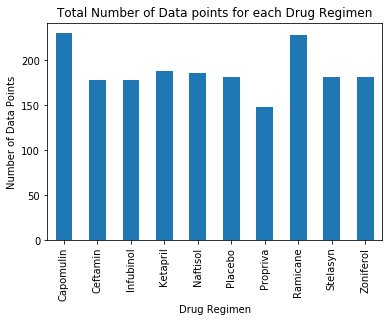

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


drug_regimen_df = combined_data_df.groupby(['Drug Regimen'])


bar1 = drug_regimen_df['Timepoint'].count().plot(kind='bar')
bar1.set_ylabel('Number of Data Points')
bar1.set_title('Total Number of Data points for each Drug Regimen')

Text(0, 0.5, 'Number of Data Points')

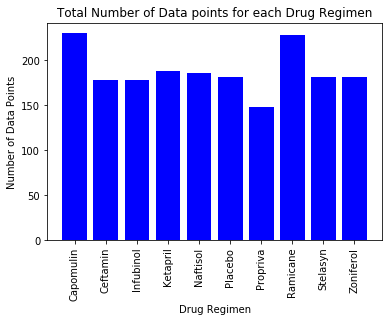

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

iso_drug = [drug_names[0] for drug_names in drug_regimen_df['Drug Regimen'].unique()]

x_axis = np.arange(len(iso_drug))
plt.bar(x_axis, drug_regimen_df.Timepoint.count(), color='b')
tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, iso_drug, rotation='vertical')

plt.title('Total Number of Data points for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

## Pie plots

In [6]:
#be able to see data frame when doing pie charts
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#find number of each sex
sexdf = combined_data_df.groupby(["Sex"])["Mouse ID"].nunique()
sexdf = pd.DataFrame(sexdf)
sexdf = sexdf.rename(columns={"Mouse ID":"Number of Each Sex"})


([<matplotlib.patches.Wedge at 0x175f2d64438>,
 [Text(0.015200833722885016, 1.1999037189100337, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.008867153005016259, 0.699943836030853, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

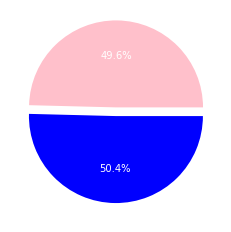

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#find number of each sex
sexdf = combined_data_df.groupby(["Sex"])["Mouse ID"].nunique()
sexdf = pd.DataFrame(sexdf)
sexdf = sexdf.rename(columns={"Mouse ID":"Number of Each Sex"})
sexdf

#set up and plot pie chart you matplotlib
sex_labels = ['Female', 'Male']
sex_counts = sexdf['Number of Each Sex']
colors = ['pink', 'blue']
explode = (0.1, 0)

plt.pie(sex_counts, labels=sex_labels, explode=explode, colors=colors, autopct="%1.1f%%", textprops={'color':"w"})


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000175F2D6E2E8>],
      dtype=object)

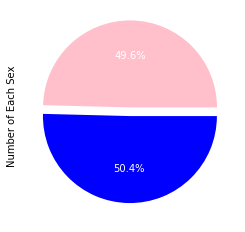

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sexdf.plot(kind='pie',subplots=True, colors=['pink', 'blue'], autopct="%1.1f%%", explode=explode, legend=False, textprops={'color':"w"})


## Quartiles, outliers and boxplots

In [10]:
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_volume = combined_data_df.groupby(['Mouse ID']).max().reset_index()
mouse_timepoint_max = final_tumor_volume[['Mouse ID', 'Timepoint']].merge(combined_data_df, on=['Mouse ID', 'Timepoint'], how='left')

# Capomulin, Ramicane, Infubinol, Ceftamin

capomulin = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin outliers
capomulin_quantiles = capomulin.quantile([.25,.50,.75])
capomulin_lowerQ = capomulin_quantiles.loc[capomulin_quantiles.index[0]]
capomulin_upperQ = capomulin_quantiles.loc[capomulin_quantiles.index[2]]
capomulin_IQR = capomulin_upperQ - capomulin_lowerQ
capomulin_lower_bound = capomulin_lowerQ - (1.5 * capomulin_IQR)
capomulin_upper_bound = capomulin_upperQ + (1.5 * capomulin_IQR)
#print(f"Capomulin potenial outliers: {capomulin.loc[(capomulin<capomulin_lower_bound)|(capomulin>capomulin_upper_bound)]}")  

#Ramicane Outliers
ramicane_quantiles = ramicane.quantile([.25,.50,.75])
ramicane_lowerQ = ramicane_quantiles.loc[ramicane_quantiles.index[0]]
ramicane_upperQ = ramicane_quantiles.loc[ramicane_quantiles.index[2]]
ramicane_IQR = ramicane_upperQ - ramicane_lowerQ
ramicane_lower_bound = ramicane_lowerQ - (1.5 * ramicane_IQR)
ramicane_upper_bound = ramicane_upperQ + (1.5 * ramicane_IQR)
#print(f"Ramicane potenial outliers: {ramicane.loc[(ramicane<ramicane_lower_bound)|(ramicane>ramicane_upper_bound)]}")  

#infubinol outliers
infubinol_quantiles = infubinol.quantile([.25,.50,.75])
infubinol_lowerQ = infubinol_quantiles.loc[infubinol_quantiles.index[0]]
infubinol_upperQ = infubinol_quantiles.loc[infubinol_quantiles.index[2]]
infubinol_IQR = infubinol_upperQ - infubinol_lowerQ
infubinol_lower_bound = infubinol_lowerQ - (1.5 * infubinol_IQR)
infubinol_upper_bound = infubinol_upperQ + (1.5 * infubinol_IQR)
print(f"infubinol potenial outliers: {infubinol.loc[(infubinol<infubinol_lower_bound)|(infubinol>infubinol_upper_bound)]}")  

#Ceftamin outliers
ceftamin_quantiles = ceftamin.quantile([.25,.50,.75])
ceftamin_lowerQ = ceftamin_quantiles.loc[ceftamin_quantiles.index[0]]
ceftamin_upperQ = ceftamin_quantiles.loc[ceftamin_quantiles.index[2]]
ceftamin_IQR = ceftamin_upperQ - ceftamin_lowerQ
ceftamin_lower_bound = ceftamin_lowerQ - (1.5 * ceftamin_IQR)
ceftamin_upper_bound = ceftamin_upperQ + (1.5 * ceftamin_IQR)
#print(f"ceftamin potenial outliers: {ceftamin.loc[(ceftamin<ceftamin_lower_bound)|(ceftamin>ceftamin_upper_bound)]}")  




infubinol potenial outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


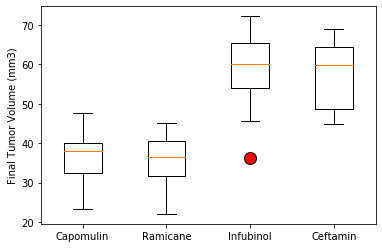

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], \
           flierprops={'markerfacecolor':'red', 'markersize':12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.savefig('Final Tumor Volume (mm3).png')
plt.show()



## Line and scatter plots

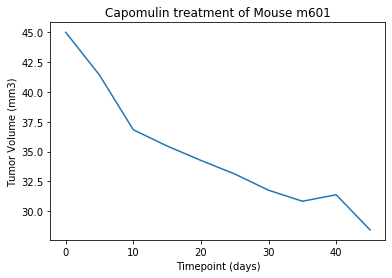

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_table = combined_data_df.loc[combined_data_df['Drug Regimen']=='Capomulin']
id_m601 = capomulin_table.loc[capomulin_table['Mouse ID']=='m601']
plt.plot(id_m601['Timepoint'], id_m601['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of Mouse m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Mouse m601 Capomulin Treatment.png')
plt.show()


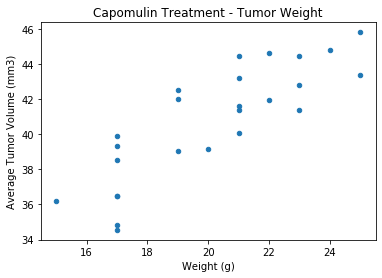

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_vs_tumor = capomulin_table.groupby("Mouse ID").mean().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
weight_vs_tumor.plot(kind='scatter',x='Weight (g)',y='Average Tumor Volume (mm3)',title='Capomulin Treatment - Tumor Weight')
plt.savefig('Tumor vs Weight.png')
plt.show()



The mouse weight and average tumor correlation is 0.84.


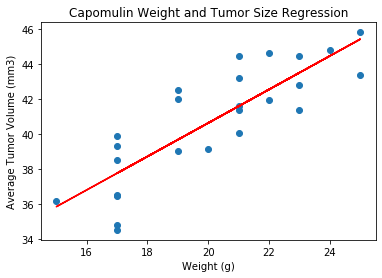

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

r = round(st.pearsonr(weight_vs_tumor['Weight (g)'], weight_vs_tumor['Average Tumor Volume (mm3)'])[0],2)
print(f'The mouse weight and average tumor correlation is {r}.')
regress = st.linregress(weight_vs_tumor['Weight (g)'], weight_vs_tumor['Average Tumor Volume (mm3)'])
y_values=weight_vs_tumor['Weight (g)']*regress[0]+regress[1]
plt.scatter(weight_vs_tumor['Weight (g)'], weight_vs_tumor['Average Tumor Volume (mm3)'])
plt.plot(weight_vs_tumor['Weight (g)'], y_values,color='red')
plt.title('Capomulin Weight and Tumor Size Regression')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.savefig('Capomulin Regression')
plt.show()

